In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import csv
airbnb_data = "Resources/AB_NYC_2019.csv"
airbnb_df = pd.read_csv(airbnb_data, encoding="UTF-8")

In [2]:
# create the first dataframe
AB_df = pd.DataFrame(airbnb_df)

In [3]:
#create a dataframe with the information that we want to utilize
NY_AB_reorganized = AB_df[["neighbourhood_group", "room_type", "price", "availability_365", "minimum_nights"]]
NY_AB_reorganized.head()

,neighbourhood_group,room_type,price,availability_365,minimum_nights
0,Brooklyn,Private room,149,365,1
1,Manhattan,Entire home/apt,225,355,1
2,Manhattan,Private room,150,365,3
3,Brooklyn,Entire home/apt,89,194,1
4,Manhattan,Entire home/apt,80,0,10


In [4]:
# Rename the columns to make it easier to read
NY_renamed = NY_AB_reorganized.rename(columns={"neighbourhood_group": "Neighborhood", "room_type": "Room type", "price": "Price", "availability_365": "Availability"})
NY_renamed.head()

,Neighborhood,Room type,Price,Availability,minimum_nights
0,Brooklyn,Private room,149,365,1
1,Manhattan,Entire home/apt,225,355,1
2,Manhattan,Private room,150,365,3
3,Brooklyn,Entire home/apt,89,194,1
4,Manhattan,Entire home/apt,80,0,10


In [5]:
#groupby neighborhood, display neighborhood by room type, neighborhood by price
grouped_NYC_df = NY_renamed.groupby(['Neighborhood', 'Room type'])
grouped_NYC_df.head()

,Neighborhood,Room type,Price,Availability,minimum_nights
0,Brooklyn,Private room,149,365,1
1,Manhattan,Entire home/apt,225,355,1
2,Manhattan,Private room,150,365,3
3,Brooklyn,Entire home/apt,89,194,1
4,Manhattan,Entire home/apt,80,0,10
...,...,...,...,...,...
29852,Staten Island,Shared room,20,0,4
35232,Staten Island,Shared room,95,37,3
35265,Staten Island,Shared room,75,37,2
35268,Staten Island,Shared room,75,37,2


In [6]:
# create a DF that groups neighborhood, and roomtype. find the mean of price
avg_price_NYC_df = pd.DataFrame(NY_renamed.groupby(['Neighborhood', 'Room type']).mean()['Price'])
avg_price_NYC_df

Price
Neighborhood  Room type                  
Bronx         Entire home/apt  127.506596
              Private room      66.788344
              Shared room       59.800000
Brooklyn      Entire home/apt  178.327545
              Private room      76.500099
              Shared room       50.527845
Manhattan     Entire home/apt  249.239109
              Private room     116.776622
              Shared room       88.977083
Queens        Entire home/apt  147.050573
              Private room      71.762456
              Shared room       69.020202
Staten Island Entire home/apt  173.846591
              Private room      62.292553
              Shared room       57.444444

In [7]:
# create a DF that which is grouped by neighborhood and room type. Find the mean of availability
availability_NYC_df = pd.DataFrame(NY_renamed.groupby(['Neighborhood', 'Room type']).mean()['Availability'])
availability_NYC_df.head()

Availability
Neighborhood Room type                    
Bronx        Entire home/apt    158.000000
             Private room       171.331288
             Shared room        154.216667
Brooklyn     Entire home/apt     97.205147
             Private room        99.917983

In [8]:
#merge the two DF together wth the concat function
NY_merge = pd.concat([avg_price_NYC_df, availability_NYC_df], axis=1, join="inner")

In [9]:
# add the days booked column to the DF. find the values of the column by -365 and the avg days available
NY_merge['Days booked'] = 365-NY_merge['Availability']
NY_merge

Price  Availability  Days booked
Neighborhood  Room type                                             
Bronx         Entire home/apt  127.506596    158.000000   207.000000
              Private room      66.788344    171.331288   193.668712
              Shared room       59.800000    154.216667   210.783333
Brooklyn      Entire home/apt  178.327545     97.205147   267.794853
              Private room      76.500099     99.917983   265.082017
              Shared room       50.527845    178.007264   186.992736
Manhattan     Entire home/apt  249.239109    117.140996   247.859004
              Private room     116.776622    101.845026   263.154974
              Shared room       88.977083    138.572917   226.427083
Queens        Entire home/apt  147.050573    132.267176   232.732824
              Private room      71.762456    149.222716   215.777284
              Shared room       69.020202    192.186869   172.813131
Staten Island Entire home/apt  173.846591    178.073864   186.926136
              Private room      62.292553    226.361702   138.638298
              Shared room       57.444444     64.777778   300.222222

In [10]:
#find the avg revenue by price * days booked
NY_merge['Avg Revenue'] = NY_merge['Price']*NY_merge['Days booked']
NY_merge

Price  Availability  Days booked  \
Neighborhood  Room type                                                
Bronx         Entire home/apt  127.506596    158.000000   207.000000   
              Private room      66.788344    171.331288   193.668712   
              Shared room       59.800000    154.216667   210.783333   
Brooklyn      Entire home/apt  178.327545     97.205147   267.794853   
              Private room      76.500099     99.917983   265.082017   
              Shared room       50.527845    178.007264   186.992736   
Manhattan     Entire home/apt  249.239109    117.140996   247.859004   
              Private room     116.776622    101.845026   263.154974   
              Shared room       88.977083    138.572917   226.427083   
Queens        Entire home/apt  147.050573    132.267176   232.732824   
              Private room      71.762456    149.222716   215.777284   
              Shared room       69.020202    192.186869   172.813131   
Staten Island Entire home/apt  173.846591    178.073864   186.926136   
              Private room      62.292553    226.361702   138.638298   
              Shared room       57.444444     64.777778   300.222222   

                                Avg Revenue  
Neighborhood  Room type                      
Bronx         Entire home/apt  26393.865435  
              Private room     12934.812451  
              Shared room      12604.843333  
Brooklyn      Entire home/apt  47755.198628  
              Private room     20278.800492  
              Shared room       9448.339991  
Manhattan     Entire home/apt  61776.157438  
              Private room     30730.348995  
              Shared room      20146.821463  
Queens        Entire home/apt  34223.495076  
              Private room     15484.707709  
              Shared room      11927.597235  
Staten Island Entire home/apt  32496.471559  
              Private room      8636.133545  
              Shared room      17246.098765

In [11]:
#use the Loc function to genreate a DF for each of the neighborhoods
bronx_df = NY_renamed.loc[NY_renamed["Neighborhood"] == "Bronx", :]
brooklyn_df = NY_renamed.loc[NY_renamed["Neighborhood"] == "Brooklyn", :]
manh_df = NY_renamed.loc[NY_renamed["Neighborhood"] == "Manhattan", :]
queens_df = NY_renamed.loc[NY_renamed["Neighborhood"] == "Queens", :]
staten_df = NY_renamed.loc[NY_renamed["Neighborhood"] == "Staten Island", :]

In [12]:
#creat a df and merge it to the df that we are using in reference.
bronx = bronx_df.groupby('Room type').mean()['Price']
bronxvol = pd.DataFrame(bronx)
bronxmerge = pd.merge(bronxvol, NY_renamed, on=("Room type", "Price"),how="left")

C:\Users\eloba\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:1089: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


In [13]:
# Create the DF for the box plot for this neighborhood.
neighborhood1 = bronxmerge["Price"]

In [14]:
brooklyn = brooklyn_df.groupby('Room type').mean()['Price']
brooklynvol = pd.DataFrame(brooklyn)
brooklynmerge = pd.merge(brooklynvol, NY_renamed, on=("Room type", "Price"),how="left")

In [15]:
neighborhood2 = brooklynmerge["Price"]

In [16]:
manh = manh_df.groupby('Room type').mean()['Price']
manhvol = pd.DataFrame(manh)
manhmerge = pd.merge(manhvol, NY_renamed, on=("Room type", "Price"),how="left")

In [17]:
neighborhood3 = manhmerge["Price"]

In [18]:
queens = queens_df.groupby('Room type').mean()['Price']
queensvol = pd.DataFrame(queens)
queensmerge = pd.merge(queensvol, NY_renamed, on=("Room type", "Price"),how="left")

In [19]:
neighborhood4 = queensmerge["Price"]

In [20]:
staten = staten_df.groupby('Room type').mean()['Price']
statenvol = pd.DataFrame(staten)
statenmerge = pd.merge(statenvol, NY_renamed, on=("Room type", "Price"),how="left")

In [21]:
neighborhood5 = statenmerge["Price"]

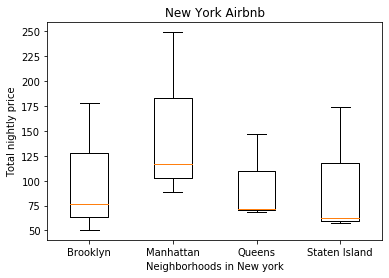

In [22]:
drug_boxplot = [neighborhood2, neighborhood3, neighborhood4, neighborhood5]

fig1, ax1 = plt.subplots()
ax1.set_title('New York Airbnb')
ax1.set_ylabel('Total nightly price')
ax1.set_xlabel('Neighborhoods in New york')

ax1.boxplot(drug_boxplot, labels=["Brooklyn","Manhattan","Queens","Staten Island"])

plt.savefig('boxplot')
plt.show()